In [1]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_excel
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras import metrics
import numpy as np
import numpy
import keras
dataset = read_excel(r'C:\Users\euripab\Desktop\ML Extraction\Statistics\results2_MeanMaxMin_SupervisedData\supervised_all_28_1.xlsx')
dataset = dataset.sample(frac=1, replace=False)
#dataset = dataset.reset_index(drop=True)
dataset

C:\Users\euripab\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


,CQImoyen mean(t-28),CQImoyen min(t-28),CQImoyen max(t-28),TraficDataDL mean(t-28),TraficDataDL min(t-28),TraficDataDL max(t-28),TraficDataUL mean(t-28),TraficDataUL min(t-28),TraficDataUL max(t-28),VoIPqualitymeasinsuffstat mean(t-28),...,VoIPqualitymeasinsuffstat max(t),CROZON_NombredeConnexionsPS mean(t),CROZON_NombredeConnexionsPS min(t),CROZON_NombredeConnexionsPS max(t),nbUEVoIPqualityOK mean(t),nbUEVoIPqualityOK min(t),nbUEVoIPqualityOK max(t),Nbrtentatives_QCi5__TEAVoix mean(t),Nbrtentatives_QCi5__TEAVoix min(t),Nbrtentatives_QCi5__TEAVoix max(t)
205,11.021176,10.09,12.65,1898.592941,425.30,3155.24,152.974118,38.42,256.92,26.588235,...,40,1404.529412,0,3231,3.764706,0,11,329.823529,0,878
823,10.370588,9.53,11.72,601.392353,246.25,999.36,45.693529,23.43,80.68,3.941176,...,41,1698.176471,640,2615,10.058824,0,32,505.352941,196,767
647,14.051765,13.90,14.15,973.804118,356.76,2079.09,96.815882,32.26,249.77,4.764706,...,19,5012.470588,1510,9649,6.117647,1,17,1152.411765,319,2389
35,11.699412,11.01,12.58,951.211176,163.02,3537.85,53.539412,12.66,105.20,8.352941,...,47,2428.235294,2032,2833,18.294118,2,42,671.764706,523,855
152,10.182353,9.54,11.17,2271.360588,822.41,4364.32,251.580588,49.40,1073.06,27.764706,...,140,3931.117647,1693,5434,24.588235,1,46,804.764706,262,1179
790,9.572941,8.49,10.46,291.687059,67.67,730.23,21.796471,6.81,58.22,6.705882,...,52,722.176471,269,1359,11.470588,0,23,149.411765,38,302
793,10.514118,8.56,11.59,38.071765,1.48,175.76,4.255294,0.13,23.21,1.294118,...,10,83.058824,31,123,1.176471,0,4,27.294118,0,56
743,10.944118,10.42,11.93,423.155294,70.29,736.13,44.150588,6.75,112.91,3.000000,...,65,3608.764706,838,5875,8.823529,0,14,804.941176,260,1612
104,11.180588,9.21,11.92,390.939412,4.27,848.69,51.699412,0.34,197.07,2.000000,...,27,1928.647059,222,3585,4.411765,0,13,603.352941,0,1346
656,0.000000,0.00,0.00,0.000000,0.00,0.00,0.000000,0.00,0.00,0.000000,...,0,0.000000,0,0,0.000000,0,0,0.000000,0,0


Train on 200 samples, validate on 720 samples
Epoch 1/50
 - 0s - loss: 0.1773 - mean_squared_error: 0.1773 - val_loss: 0.0393 - val_mean_squared_error: 0.0393
Epoch 2/50
 - 0s - loss: 0.0322 - mean_squared_error: 0.0322 - val_loss: 0.0345 - val_mean_squared_error: 0.0345
Epoch 3/50
 - 0s - loss: 0.0295 - mean_squared_error: 0.0295 - val_loss: 0.0324 - val_mean_squared_error: 0.0324
Epoch 4/50
 - 0s - loss: 0.0268 - mean_squared_error: 0.0268 - val_loss: 0.0307 - val_mean_squared_error: 0.0307
Epoch 5/50
 - 0s - loss: 0.0242 - mean_squared_error: 0.0242 - val_loss: 0.0278 - val_mean_squared_error: 0.0278
Epoch 6/50
 - 0s - loss: 0.0219 - mean_squared_error: 0.0219 - val_loss: 0.0255 - val_mean_squared_error: 0.0255
Epoch 7/50
 - 0s - loss: 0.0199 - mean_squared_error: 0.0199 - val_loss: 0.0234 - val_mean_squared_error: 0.0234
Epoch 8/50
 - 0s - loss: 0.0555 - mean_squared_error: 0.0555 - val_loss: 0.0767 - val_mean_squared_error: 0.0767
Epoch 9/50
 - 0s - loss: 0.0351 - mean_squared_err

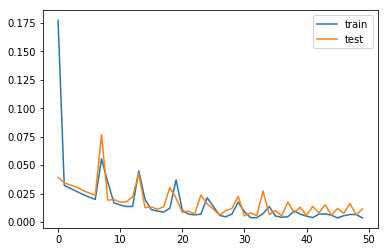

Test RMSE: 0.107


In [4]:
values = dataset.values


n_days_pred = 1 
n_days = 28
n_features = 7*3
n_obs = n_days*n_features
n_train_samples = 200
values = values.astype('float32')
#Scale Data
scaler = MinMaxScaler()
values = scaler.fit_transform(values)

dictionary = dict(zip(dataset.columns, range(0,len(dataset.columns))))

feat_list = [(i-1)*7*n_features+j for j in range(0,n_features) for i in range(1,4)]

train = values[:n_train_samples, :]
test = values[n_train_samples:, :]
# split into input and outputs
n_obs = n_days * n_features
train_X, train_y = train[:, feat_list], train[:,dictionary['CQImoyen max(t)']]
test_X, test_y = test[:, feat_list], test[:,dictionary['CQImoyen max(t)']]


#Split Values into Classification columns
#train_y = keras.utils.to_categorical(train_y,num_classes=num_classes)
#test_y = keras.utils.to_categorical(test_y,num_classes=num_classes)
# reshape input to be 3D [samples, timesteps, features]
#train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
#test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
#print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
dim = len(feat_list)

# design network
model = Sequential()
model.add(Dense(dim*10, activation='relu', input_dim =dim))
model.add(Dense(dim*2, activation='sigmoid'))
model.add(Dense(1,activation = 'relu'))
model.compile(loss='mse', optimizer='rmsprop',metrics=[metrics.mse])
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y),verbose = 2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
# make a prediction
yhat = model.predict(test_X)

rmse = sqrt(mean_squared_error(test_y, yhat))
print('Test RMSE: %.3f' % rmse)





In [5]:
y_pred_train = model.predict(train_X)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000FB52550>]],
      dtype=object)

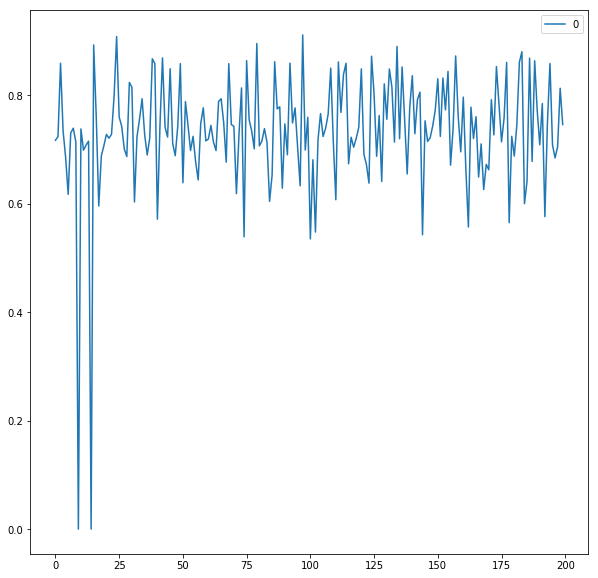

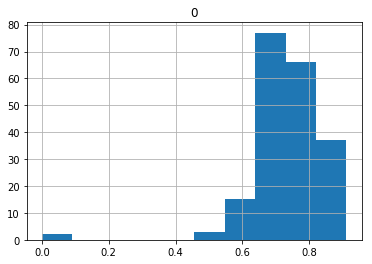

In [6]:
DataFrame(y_pred_train).plot(figsize = (10,10))
DataFrame(y_pred_train).hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000F8B5518>]],
      dtype=object)

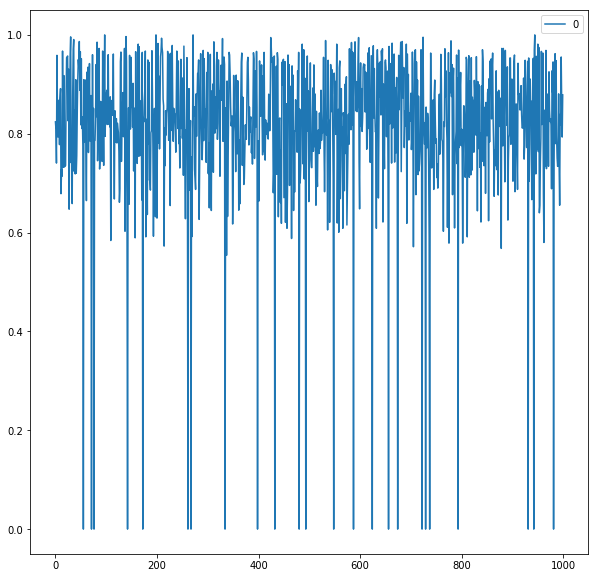

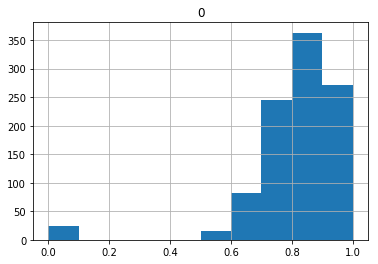

In [8]:
DataFrame(train_y).plot(figsize = (10,10))
DataFrame(train_y).hist()

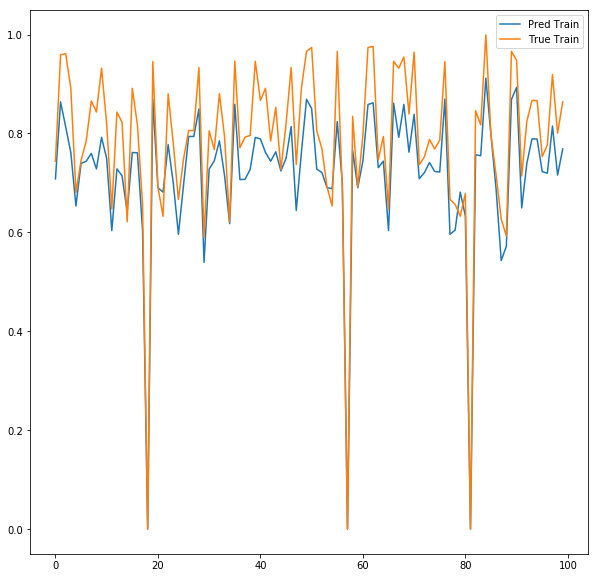

In [9]:
res = DataFrame()
n = np.random.choice(len(train_y), 100)
res['Pred Train'] = DataFrame(y_pred_train[n])[0]
res['True Train'] = DataFrame(train_y[n])[0]
res.plot(figsize = (10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000100A6BA8>]],
      dtype=object)

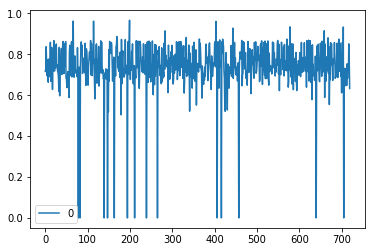

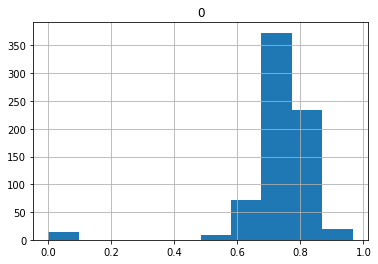

In [10]:
y_pred_test = model.predict(test_X)
DataFrame(y_pred_test).plot()
DataFrame(y_pred_test).hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000F57F438>]],
      dtype=object)

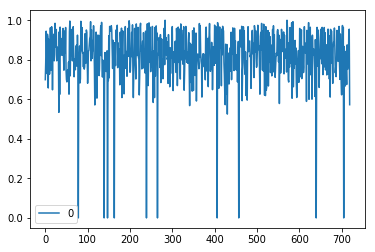

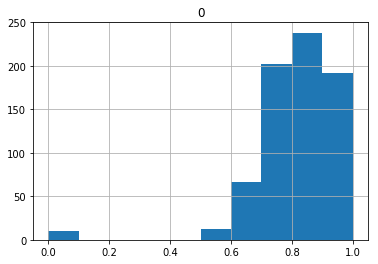

In [11]:
DataFrame(test_y).plot()
DataFrame(test_y).hist()

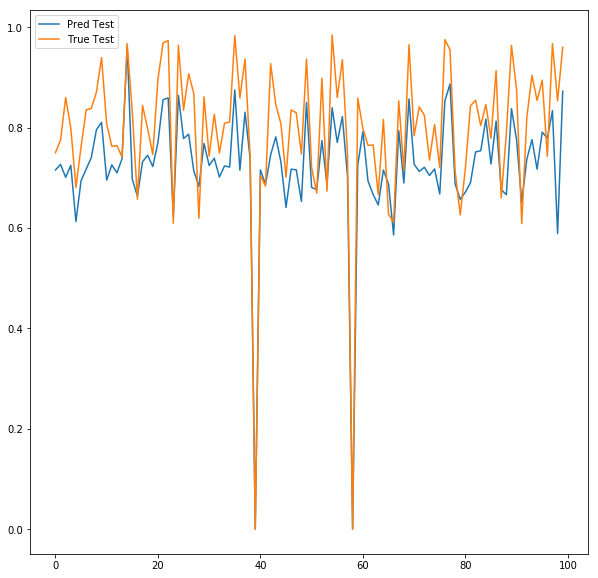

In [12]:
res = DataFrame()
n = np.random.choice(len(test_y), 100)
res['Pred Test'] = DataFrame(y_pred_test[n])[0]
res['True Test'] = DataFrame(test_y[n])[0]
res.plot(figsize = (10,10))

In [24]:
mask1 = [DataFrame(yhat)[0]>0.5]
numpy.sum(mask1)

3077

In [11]:
mask2 = [DataFrame(test_y)[0]>0.5]
numpy.sum(mask2)

3074

In [12]:
a = [mask1[i] == mask2[i] for i in range(0,len(mask1))]
numpy.sum(a)/len(test)

0.021019108280254776

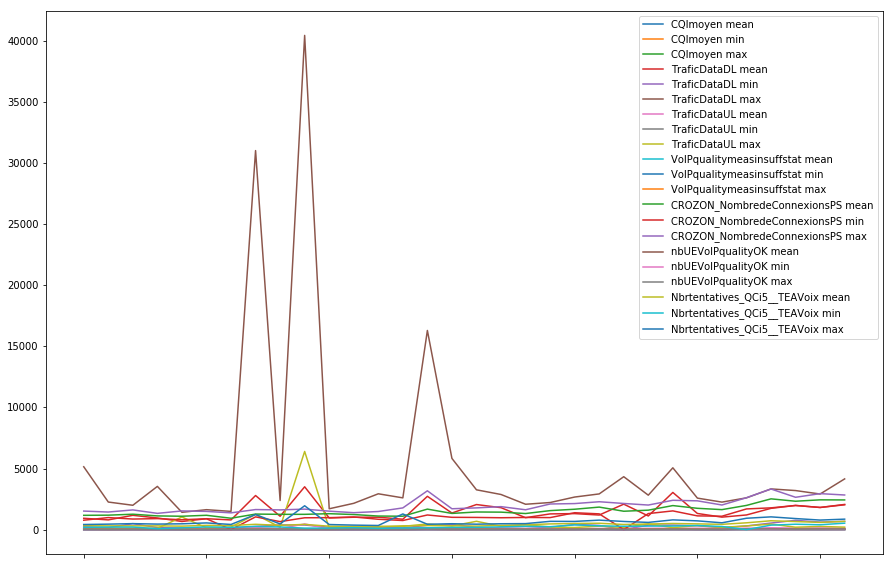

In [13]:
cellKpi= pd.read_excel(r'C:\Users\euripab\Desktop\ML Extraction\Statistics\results1_MeanMaxMin_PerDay\MeanMaxMin_PerDay_all_D10664B.xlsx')
cellKpi.plot(y =cellKpi.columns, kind='line',figsize = (15,10))

In [14]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [(name+'(t-%d)' % (i)) for name in data.columns]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [name+'(t)' for name in data.columns]
		else:
			names += [(name+'(t+%d)' % (i)) for name in data.columns]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg


In [15]:
example_values = series_to_supervised(cellKpi, n_in=1, n_out=7, dropnan=True).values
example_values = scaler.transform(example_values)

ValueError: operands could not be broadcast together with shapes (25,168) (315,) (25,168) 

In [ ]:
example_values_X = example_values[:, range(0,n_obs)]
example_values_y = example_values[:, n_obs+(n_days_pred-1)*n_features+1]

In [ ]:
yhat = model.predict(example_values_X)

In [ ]:
ex = DataFrame()
ex['Pred'] = DataFrame(yhat)[0]
ex['True'] = DataFrame(example_values_y)[0]
ex.plot()

In [55]:
dictionary

{'CQImoyen mean(t-14)': 0,
 'CQImoyen min(t-14)': 1,
 'CQImoyen max(t-14)': 2,
 'TraficDataDL mean(t-14)': 3,
 'TraficDataDL min(t-14)': 4,
 'TraficDataDL max(t-14)': 5,
 'TraficDataUL mean(t-14)': 6,
 'TraficDataUL min(t-14)': 7,
 'TraficDataUL max(t-14)': 8,
 'VoIPqualitymeasinsuffstat mean(t-14)': 9,
 'VoIPqualitymeasinsuffstat min(t-14)': 10,
 'VoIPqualitymeasinsuffstat max(t-14)': 11,
 'CROZON_NombredeConnexionsPS mean(t-14)': 12,
 'CROZON_NombredeConnexionsPS min(t-14)': 13,
 'CROZON_NombredeConnexionsPS max(t-14)': 14,
 'nbUEVoIPqualityOK mean(t-14)': 15,
 'nbUEVoIPqualityOK min(t-14)': 16,
 'nbUEVoIPqualityOK max(t-14)': 17,
 'Nbrtentatives_QCi5__TEAVoix mean(t-14)': 18,
 'Nbrtentatives_QCi5__TEAVoix min(t-14)': 19,
 'Nbrtentatives_QCi5__TEAVoix max(t-14)': 20,
 'CQImoyen mean(t-13)': 21,
 'CQImoyen min(t-13)': 22,
 'CQImoyen max(t-13)': 23,
 'TraficDataDL mean(t-13)': 24,
 'TraficDataDL min(t-13)': 25,
 'TraficDataDL max(t-13)': 26,
 'TraficDataUL mean(t-13)': 27,
 'TraficData

275